Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         rating   members
954    0.729892  0.024391
10037  0.503001  0.000096
47     0.840336  0.095849
8573   0.417767  0.000433
11111  0.588235  0.004373
...         ...       ...
4859   0.594238  0.017436
3264   0.644658  0.004104
9845   0.480192  0.000062
10799  0.288115  0.000053
2732   0.661465  0.003571

[6147 rows x 2 columns]
       episodes
954           0
10037         1
47            0
8573          0
11111         0
...         ...
4859          0
3264          0
9845          0
10799         0
2732          0

[6147 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


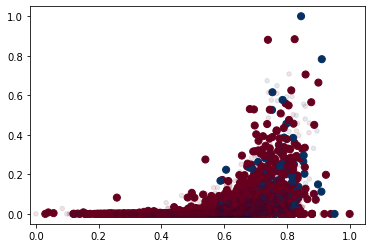

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GaussianNB 'test' accuracy: 0.8174719375305027
SGDClassifier 'test' accuracy: 0.828696925329429
SVM 'test' accuracy: 0.828696925329429 

total misclassifications SVM:  1053 

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      5094
           1       0.00      0.00      0.00      1053

    accuracy                           0.83      6147
   macro avg       0.41      0.50      0.45      6147
weighted avg       0.69      0.83      0.75      6147



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


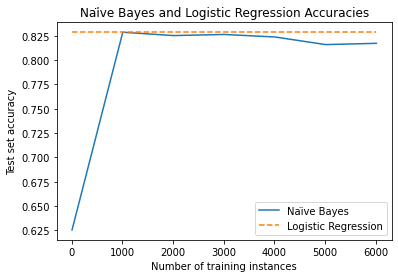

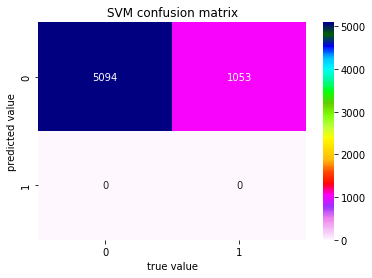

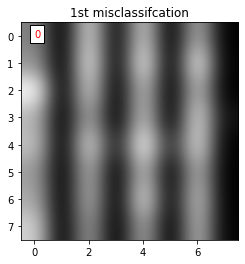

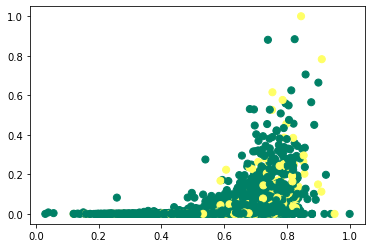

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:159: UserWarning: No contour levels were found within the data range.


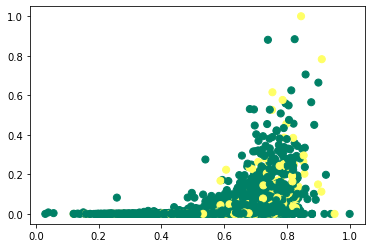

In [54]:
'''
Assignment II

Due: May 29, 2022.
Pick a dataset of your choice. From UCI classification datasets
(https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table)
Use the SVM  (svm.py) , Naïve Bayes (gaussNB.py) ,  as we learned in lecture 2 to classify the data

You can create also test data and check percentage of error – how good the algorithm performed.
Play with relevant parameters and determine the accuracy of the method. Print also confusion matrix to get a good sense
of the error made by the model.

Submit:
1) code in Python
2) a word file summarizing the result include some measure of performance such as confusion matrix, and accuracy.

Enjoy!!
'''
from google.colab import drive
drive.mount('/content/drive')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/anime.csv", sep=",")
dataframe['episodes'] = pd.to_numeric(dataframe["episodes"], errors='coerce').fillna(1000).astype(int)
dataframe.episodes[dataframe.episodes <= 25] = 0
dataframe.episodes[dataframe.episodes > 25] = 1
selected_column = [5,6]
feature_data = dataframe.iloc[:, selected_column]
from sklearn.impute import SimpleImputer
def imputation(original_data):
    imputer = SimpleImputer(strategy="median")
    imputer.fit(original_data)
    X = imputer.transform(original_data)
    return pd.DataFrame(X, columns=original_data.columns, index=original_data.index)
feature_data_imputed = imputation(feature_data)
from sklearn.preprocessing import MinMaxScaler
def MMScaling(original_data):
    MMS = MinMaxScaler()
    X= MMS.fit_transform(original_data)
    return pd.DataFrame(X, columns=original_data.columns,
                          index=original_data.index)
feature_data_imputed_scaled = MMScaling(feature_data_imputed)
label_data = dataframe.iloc[:, 4]
label_data_bool = pd.DataFrame(label_data)
# GaussianNB
from sklearn.model_selection import train_test_split
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(feature_data_imputed_scaled,label_data_bool, test_size=0.5, random_state=0)
print(X_train_set)
print(y_train_set)
X_train = np.array(X_train_set)
y_train = np.array(y_train_set)
X_test = np.array(X_test_set)
y_test = np.array(y_test_set)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)
plt.show()
lr = LogisticRegression()
nb = GaussianNB()
lr_scores = []
nb_scores = []
train_sizes = range(10, len(X_train), 1000)
for train_size in train_sizes:
  X_slice, _, y_slice, _ = train_test_split(X_train, y_train, train_size=train_size, stratify=y_train, random_state=11)
  nb.fit(X_slice, y_slice)
  nb_scores.append(nb.score(X_test, y_test))
  lr.fit(X_slice, y_slice)
  lr_scores.append(lr.score(X_test, y_test))
plt.plot(train_sizes, nb_scores, label='Naïve Bayes')
plt.plot(train_sizes, lr_scores, linestyle='--', label='Logistic Regression')
plt.title("Naïve Bayes and Logistic Regression Accuracies")
plt.xlabel("Number of training instances")
plt.ylabel("Test set accuracy")
plt.legend()
plt.figure(1)
y_pred = nb.fit(X_train, y_train).predict(X_test)

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
def find_misses(test, pred):
  return[i for i, row in enumerate(test) if row != pred[i]]
if __name__ == "__main__":
  br = "\n"
  gnb = GaussianNB().fit(X_train, y_train)
  gnb_name = gnb.__class__.__name__
  y_pred = gnb.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print (gnb_name + ' \'test\' accuracy:', accuracy)
  scaler = StandardScaler()
  X_train_std = scaler.fit_transform(X_train)
  y_train_std = scaler.fit_transform(y_train)
  X_test_std = scaler.fit_transform(X_test)
  y_test_std = scaler.fit_transform(y_test)
  sgd = SGDClassifier(random_state=0, max_iter=1000, tol=0.001)
  sgd_name = sgd.__class__.__name__
  sgd.fit(X_train_std, y_train)
  y_pred = sgd.predict(X_test_std)
  accuracy = accuracy_score(y_test, y_pred)
  print (sgd_name + ' \'test\' accuracy:', accuracy)
  svm = SVC(gamma='auto').fit(X_train_std, y_train)
  svm_name = "SVM"
  y_pred = svm.predict(X_test_std)
  accuracy = accuracy_score(y_test, y_pred)
  print (svm_name + ' \'test\' accuracy:', accuracy, br)
  indx = find_misses(y_test, y_pred)
  print(f'total misclassifications {svm_name}:  {len(indx)} {br}')
  misses = [(y_pred[row], y_test[row], i)for i, row in enumerate(indx)] 
  img_indx = misses[0][2]
  img_pred = misses[0][0]
  img_act = misses[0][1]
  text = str(img_pred)
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(2)
  ax = plt.axes()
  sns.heatmap(cm.T, annot=True, fmt="d",cmap='gist_ncar_r', ax=ax)
  title = svm_name + ' confusion matrix'
  ax.set_title(title)
  plt.xlabel('true value')
  plt.ylabel('predicted value')
  test_images = X_test[0:4096].reshape(-1, 8, 8)
  plt.figure(3)
  plt.title('1st misclassifcation')
  plt.imshow(test_images[img_indx], cmap="gray", interpolation="gaussian")
  plt.text(0, 0.05, text, color="r", bbox=dict(facecolor='white'))
  plt.show()

# svm
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        # create grid to evaluate model
        x = np.linspace(xlim[0], xlim[1], 30)

        y = np.linspace(ylim[0], ylim[1], 30)
        Y, X = np.meshgrid(y, x)
        xy = np.vstack([X.ravel(), Y.ravel()]).T
        P = model.decision_function(xy).reshape(X.shape)
        # plot decision boundary and margins
        ax.contour(X, Y, P, colors='k',
        levels=[-1, 0, 1], alpha=0.5,
        linestyles=['--', '-', '--'])
        # plot support vectors
        if plot_support:
            ax.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

X = X_train
y= y_train
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer');
plt.show()

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plot_svc_decision_function(model);
plt.show()
